In [83]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

In [201]:
df = pd.read_csv("train.csv")

In [202]:
test_df = pd.read_csv('test.csv')

In [203]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,target
0,-443.171017,-7.046932,-0.651368,s,False,l,-2.386104,-12.015035,-53.366720,294.178647,...,b,-263.102352,-0.828608,-5915.544513,14.297375,-0.299288,b,z2,x,0
1,-230.778558,-7.046932,-0.552333,s,NaN,l,-2.254475,-11.529238,-252.553855,346.713750,...,b,-133.804149,-1.111975,-5901.510546,43.164945,0.012027,b,k1,m,0
2,77.218442,-7.046932,-0.291180,s,False,s,-1.031829,-14.143163,-104.479052,413.070692,...,a,380.620191,-1.015323,-5886.558258,-4.152467,-0.295075,m,s2,r,0
3,-351.346544,-7.046932,-0.525862,s,False,u,-1.940863,-12.355590,-297.129220,485.092044,...,b,1836.566809,-1.148728,-5902.862408,2.167434,-0.184011,b,s1,l,0
4,-45.761145,-7.046932,-0.484378,s,NaN,l,-2.266843,-12.110210,-54.779419,443.408478,...,b,-215.838000,-1.147564,-5904.609603,9.709554,0.098385,b,z2,x,0


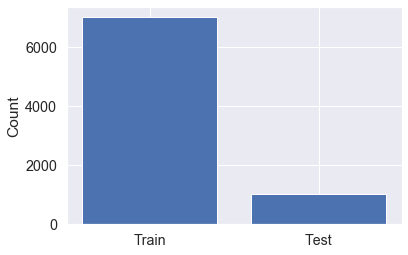

In [204]:
# How does the Train vs test look like?
plt.bar(range(2), (df.shape[0], test_df.shape[0])) 
plt.xticks(range(2), ('Train', 'Test'))
plt.ylabel('Count') 
plt.show()

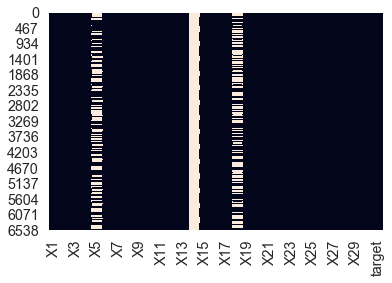

In [205]:
# Overview of missing data

sns.heatmap(df.isnull(), cbar=False)

In [206]:
df.isnull().sum().sort_values(ascending=False)

X14       7003
X18       3532
X5        3386
target       0
X15          0
X2           0
X3           0
X4           0
X6           0
X7           0
X8           0
X9           0
X10          0
X11          0
X12          0
X13          0
X16          0
X30          0
X17          0
X19          0
X20          0
X21          0
X22          0
X23          0
X24          0
X25          0
X26          0
X27          0
X28          0
X29          0
X1           0
dtype: int64

In [207]:
df["X18"].head()
# more than 50 % is blank in x18, It might be better to drop it for now

0    -749.621751
1   -2829.294253
2    -851.316155
3            NaN
4            NaN
Name: X18, dtype: float64

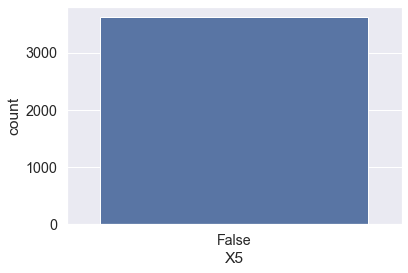

In [208]:
sns.countplot(df['X5'])
# The blank values could be True, but we are not sure. So, will skip this for now

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 31 columns):
X1        7003 non-null float64
X2        7003 non-null float64
X3        7003 non-null float64
X4        7003 non-null object
X5        3617 non-null object
X6        7003 non-null object
X7        7003 non-null float64
X8        7003 non-null float64
X9        7003 non-null float64
X10       7003 non-null float64
X11       7003 non-null float64
X12       7003 non-null float64
X13       7003 non-null object
X14       0 non-null float64
X15       7003 non-null float64
X16       7003 non-null float64
X17       7003 non-null object
X18       3471 non-null float64
X19       7003 non-null float64
X20       7003 non-null float64
X21       7003 non-null object
X22       7003 non-null object
X23       7003 non-null float64
X24       7003 non-null float64
X25       7003 non-null float64
X26       7003 non-null float64
X27       7003 non-null float64
X28       7003 non-null object
X29     

### Dropping columns

In [210]:
columns = ['X5','X14']
test_df.drop(columns, inplace=True, axis=1)

In [211]:
columns = ['X5','X14']
df.drop(columns, inplace=True, axis=1)

### Checking distribution for X18

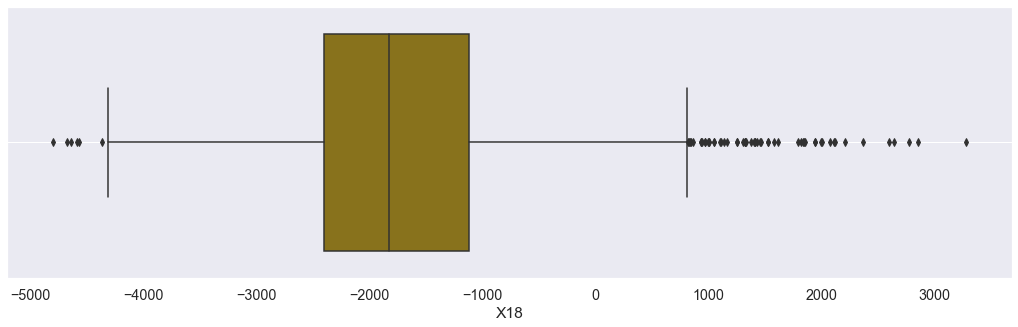

In [212]:
 #Checking for outliers, helps to decide what should be used, Mean or Media to fill NAN values.

plt.figure(figsize=(18,5))
sns.boxplot(y="X18",data=df, orient="h", color="#9A7D0A")
sns.set_color_codes(palette="colorblind")
#sns.distplot(df['X18'],color="#BB8FCE", ax=axes[1])
plt.grid()

#

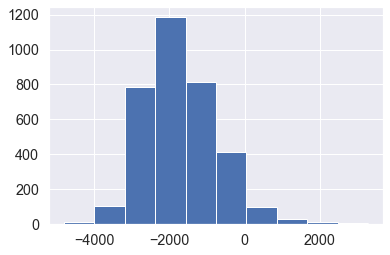

In [213]:
df['X18'].hist()
# As we can see there are few outliers in X18 attribute & also it is slightly skewed, we shall use median to fill the missing values.

In [214]:
median_value=df['X18'].median()
df['X18']=df['X18'].fillna(median_value)

In [215]:
median_value=test_df['X18'].median()
test_df['X18']=test_df['X18'].fillna(median_value)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28fc8e10>,
      dtype=object)

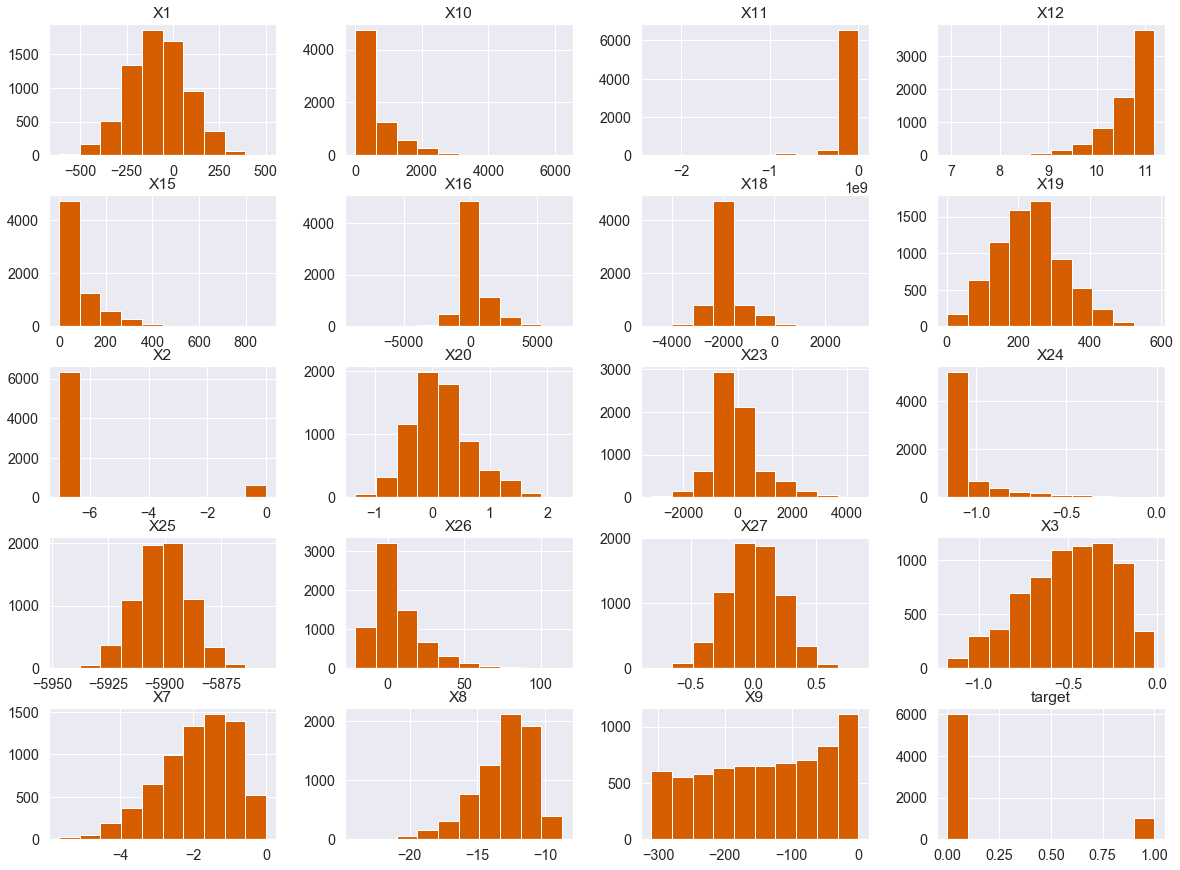

In [216]:
df.hist(figsize=(20, 15), color = 'r')

In [217]:
# Many of the variables require Normalizaion
# Few of the variables are skewed as well

In [218]:
df.skew()

X1        0.014871
X2        2.777239
X3       -0.401689
X7       -0.635028
X8       -0.945180
X9       -0.191789
X10       2.302007
X11      -7.573896
X12      -1.672011
X15       2.302007
X16       0.641276
X18       1.235430
X19       0.216972
X20       0.563914
X23       0.877486
X24       2.492738
X25       0.029146
X26       1.670427
X27       0.013751
target    2.042393
dtype: float64

In [234]:
#sns.pairplot(df, hue="target")

In [219]:
dataset =  pd.concat(objs=[df, test_df], axis=0).reset_index(drop=True)

In [220]:
dummy_variables = ['X4','X6','X13','X17','X21','X22','X28','X29','X30']
for var in dummy_variables:
    dummy = pd.get_dummies(dataset[var], prefix = var, drop_first = False)
    train = pd.concat([dataset, dummy], axis = 1)
dataset = dataset.drop(dummy_variables, axis = 1)
#dummy1.head

In [221]:
df['target'].value_counts(normalize=True)

0    0.857204
1    0.142796
Name: target, dtype: float64

In [161]:
y = dataset['target']
X = dataset.drop(['target'],axis=1)

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Decision tree 

In [163]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [164]:
predictions = dtree.predict(X_test)

In [165]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [166]:
print(confusion_matrix(y_test,predictions))

[[1216  101]
 [  70  220]]


In [167]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1317
           1       0.69      0.76      0.72       290

    accuracy                           0.89      1607
   macro avg       0.82      0.84      0.83      1607
weighted avg       0.90      0.89      0.90      1607



### Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

In [169]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.819


In [172]:
logRegprediction = logreg.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,logRegprediction ))  
print(accuracy_score(y_test, logRegprediction ))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1974
           1       0.00      0.00      0.00       437

    accuracy                           0.82      2411
   macro avg       0.41      0.50      0.45      2411
weighted avg       0.67      0.82      0.74      2411

0.8187474077146413


### ROC curve

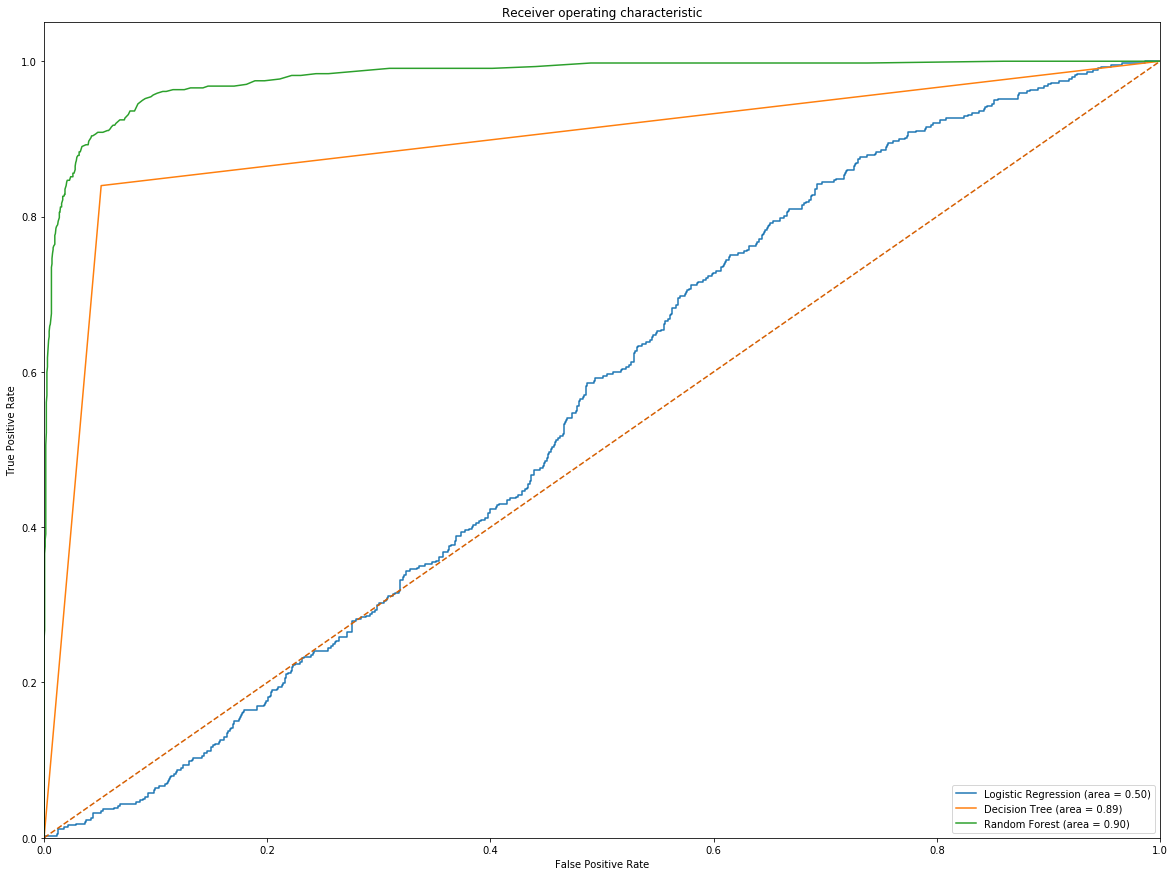

In [173]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
dpr, spr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure(figsize=(20, 15))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(dpr, spr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [230]:
# Random forest seems to be fitting the model very well

In [72]:
import imblearn

In [231]:
#Checking for PCA

In [73]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

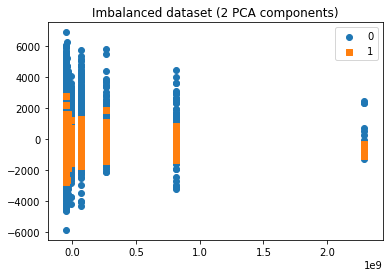

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [76]:
#from imblearn.combine import SMOTETomek

#smt = SMOTETomek(ratio='auto')
#X_smt, y_smt = smt.fit_sample(X, y)

#plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [77]:
#from sklearn import preprocessing
#import matplotlib.pyplot as plt 
#plt.rc("font", size=14)
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=0)
#from sklearn import metrics
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)

In [81]:
#X= df.drop(['target'], axis =1)

In [82]:

#from sklearn.preprocessing import StandardScaler
#X_scaled = StandardScaler().fit_transform(X)

#pca = decomposition.PCA(n_components=2)
#X_pca_scaled = pca.fit_transform(X_scaled)

#print('Projecting %d-dimensional data' % X_scaled.shape[1])

#plt.figure(figsize=(12,10))
#plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df2['target'], cmap='plasma');
#plt.colorbar()
#plt.title('PCA projection')

In [232]:
#PCA results dont look very good

In [191]:
x = dataset.drop("target",axis=1).values
y = dataset["target"].values


In [192]:
x_1 = test_df.values

In [193]:
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 42, test_size = 0.3)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((5623, 19), (2411, 19), (5623,), (2411,))

### Feature Scaling

In [194]:
feature_scale = StandardScaler()
train_x = feature_scale.fit_transform(train_x)
test_x = feature_scale.transform(test_x)

In [195]:
rf = RandomForestClassifier(criterion="entropy", max_depth=10, random_state=42)

rf.fit(train_x, train_y)

pred_rand_for = rf.predict(test_x)

rand_for_acc = accuracy_score(test_y, pred_rand_for)
print('Random Forest Accuracy:', rand_for_acc)

Random Forest Accuracy: 0.9344670261302365


In [196]:
print(classification_report(test_y,pred_rand_for))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1991
           1       0.87      0.73      0.80       420

    accuracy                           0.93      2411
   macro avg       0.91      0.86      0.88      2411
weighted avg       0.93      0.93      0.93      2411



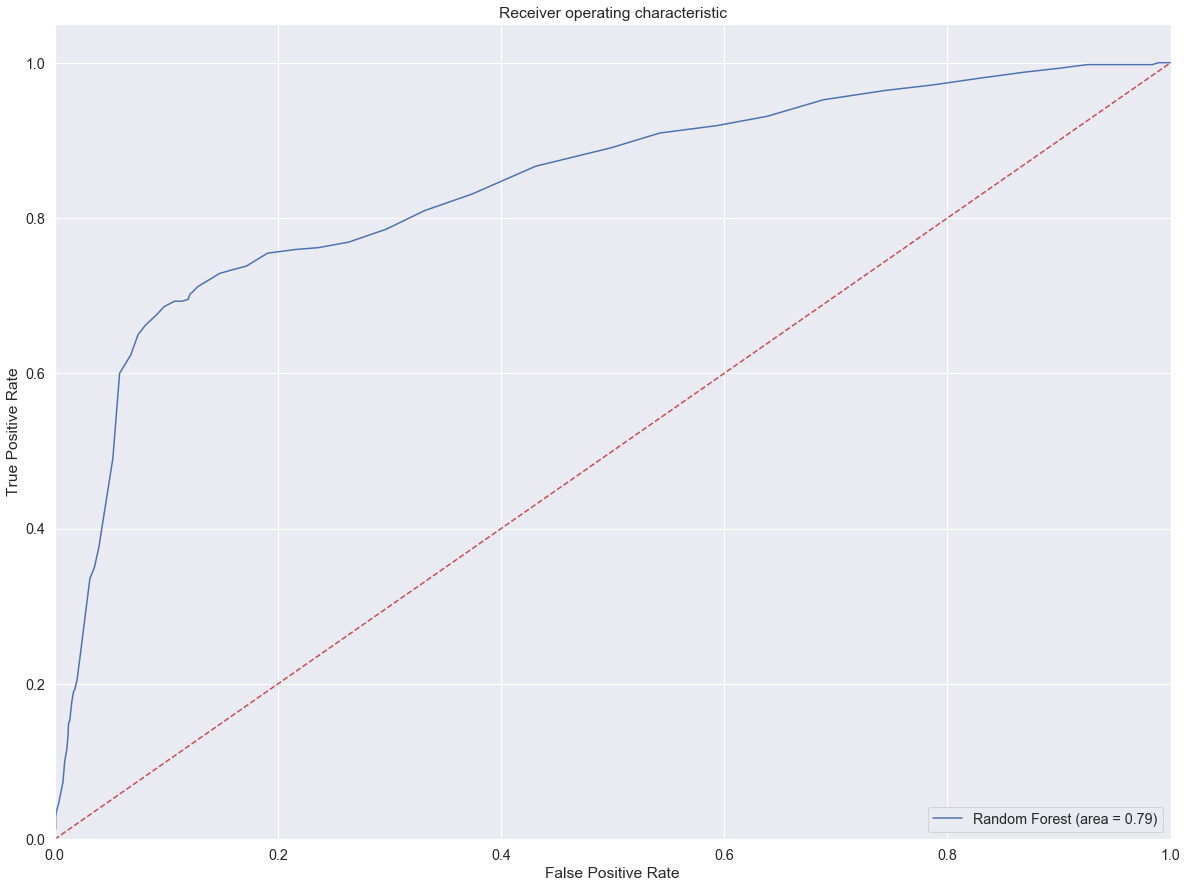

In [197]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



rf_roc_auc = roc_auc_score(test_y, classifier.predict(test_x))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(test_y, classifier.predict_proba(test_x)[:,1])



plt.figure(figsize=(20, 15))

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [198]:
# does not give the best result. Will continue to use the previous model

In [222]:
#y = dataset['target']
#X = dataset.drop(['target'],axis=1)

In [224]:
#feature_scale = StandardScaler()
#X = feature_scale.fit_transform(X)
#y = feature_scale.transform(y)